# Programming Assignment 1: Linear Regression

## Introduction

In this exercise, you will implement linear regression and get to see it work on data. After completing this assignment, you will know:
- How to implement linear regression from scratch.
- How to estimate linear regression parameters using gradient descent.
- How to make predictions on new data using learned parameters.

Let's start with the necessary imports.

In [2]:
import os
import numpy as np
from matplotlib import pyplot
%matplotlib inline

## 1. Linear Regression with one variable

Linear regression assumes a linear relationship between the input variables (X) and the single output variable (Y). More specifically, that output (Y) can be calculated from a linear combination of the input variables (X). When there is a single input variable, the method is referred to as a simple linear regression.

Now you will implement simple linear regression to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

### 1.1 Load the dataset

The file `Data/ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss. 

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables `X` and `Y`.

In [3]:
data = np.loadtxt(os.path.join('Data', 'ex1data1.txt'), delimiter=',')
X, Y = data[:, 0], data[:, -1]

In [4]:
# print(data)
print(X.shape)
print(Y.shape)

(97,)
(97,)


### 1.2 Plot the dataset
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Execute the next cell to visualize the data.

Text(0.5, 0, 'Population of City in 10,000s')

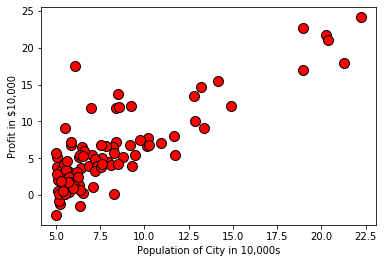

In [5]:
pyplot.plot(X, Y, 'ro', ms=10, mec='k')
pyplot.ylabel('Profit in $10,000')
pyplot.xlabel('Population of City in 10,000s')

### 1.3 Learn the parameters
In this part, you will fit the linear regression parameters $\theta$ to the food truck dataset using gradient descent.

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 ------ (i)$$ 

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta_0 + \theta_1 x ------ (ii)$$

The parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right) ------ (iii)$$

$$ \theta_1 = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x^{(i)} ------ (iv)$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

Let's start by implementing the hypothesis $h_\theta(x)$.

In [6]:
### GRADED FUNCTION ###
def predict(x, theta0, theta1):
    '''
    Calculates the hypothesis for any input sample `x` given the parameters `theta`.
    
    Arguments
    ---------
    x : float
        The input sample.
    
    theta0 : float
        The parameter for the regression function.
        
    theta1 : float
        The parameter for the regression function.
    
    Returns
    -------
    h_x : float
        The hypothesis for input sample.
    
    Hint(s)
    -------
    Compute equation (ii).
    '''
    # You need to return the following variable(s) correctly
    h_x = theta0 + theta1*x
    
    ### START CODE HERE ### (≈ 1 line of code)

    
    ### END CODE HERE ###
    
    return h_x

Execute the next cell to verify your implementation.

In [7]:
h_x = predict(x=2, theta0=1.0, theta1=1.0)
print('With x = 2, theta0 = 1.0, theta1 = 1.0\nPredicted Hypothesis h(x) = %.2f' % h_x)
print("Expected hypothesis h(x) = 3.00\n")

With x = 2, theta0 = 1.0, theta1 = 1.0
Predicted Hypothesis h(x) = 3.00
Expected hypothesis h(x) = 3.00



As you perform gradient descent to learn minimize the cost function  $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate  $J(\theta)$ so you can check the convergence of your gradient descent implementation.

In [8]:
### GRADED FUNCTION ###
def computeCost(X, Y, theta0, theta1):
    '''
    Computes cost for linear regression. Computes the cost of using `theta` as the
    parameter for linear regression to fit the data points in `X` and `Y`.
    
    Arguments
    ---------
    X : array
        The input dataset of shape (m, ), where m is the number of training examples.
    
    Y : array
        The values of the function at each data point. This is a vector of
        shape (m, ), where m is the number of training examples.
    
    theta0 : float
        The parameter for the regression function.
        
    theta1 : float
        The parameter for the regression function.
    
    Returns
    -------
    J : float
        The value of the regression cost function.
    
    Hint(s)
    -------
    Compute equation (i).
    '''
    # initialize some useful values
    m = Y.size  # number of training examples
    
    # You need to return the following variable(s) correctly
    J = (np.mean((theta0 + theta1*X - Y)**2))/(2)
        
    ### START CODE HERE ### (≈ 3-4 lines of code)

    
    ### END CODE HERE ###
    
    return J

Execute the next cell to verify your implementation.

In [9]:
J = computeCost(X, Y, theta0=1.0, theta1=1.0)
print('With theta0 = 1.0, theta1 = 1.0\nPredicted cost J = %.2f' % J)
print("Expected cost J = 10.27\n")

With theta0 = 1.0, theta1 = 1.0
Predicted cost J = 10.27
Expected cost J = 10.27



Next, you will complete a function which implements gradient descent. The loop structure has been written for you, and you only need to supply the updates to parameters $\theta_j$  within each iteration (epoch). 

The starter code for the function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a `python` list. Assuming you have implemented `gradientDescent` and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [10]:
### GRADED FUNCTION ###
def gradientDescent(X, Y, alpha, n_epoch):
    """
    Performs gradient descent to learn `theta`. Updates `theta` by taking `n_epoch`
    gradient steps with learning rate `alpha`.
    
    Arguments
    ---------
    X : array
        The input dataset of shape (m, ), where m is the number of training examples.
    
    Y : array
        The values of the function at each data point. This is a vector of
        shape (m, ), where m is the number of training examples.
    
    alpha : float
        The learning rate.
    
    n_epoch : int
        The number of iterations for gradient descent. 
    
    Returns
    -------
    theta0 : float
        The parameter for the regression function.
        
    theta1 : float
        The parameter for the regression function.
    
    J : list
        A python list for the values of the cost function after each iteration.
    
    Hint(s)
    -------
    Compute equation (iii) and (iv).

    While debugging, it can be useful to print out the values of 
    the cost function (computeCost) here.
    """
    # initialize some useful values
    m = Y.size  # number of training examples
    J = list()  # list to store cost
    
    # You need to return the following variables correctly
    theta0 = 0.0 
    theta1 = 0.0
    
    for epoch in range(n_epoch):
        
        h_x = theta0 + theta1*X
        
        theta0 = theta0 - alpha* np.mean(h_x - Y)
        theta1 = theta1 - alpha* np.mean(np.multiply(h_x - Y, X))

        J.append(computeCost(X, Y, theta0, theta1))
    return theta0, theta1, J

Execute the next cell to verify your implementation.

In [11]:
n_epoch = 1500
alpha = 0.01

theta0, theta1, J = gradientDescent(X ,Y, alpha, n_epoch)
# print(theta0)
# print("jhee")
print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))
print('Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834')

Predicted theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834
Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834


### 1.4 Plot the linear fit

Use your learned parameters $\theta_j$ to plot the linear fit.

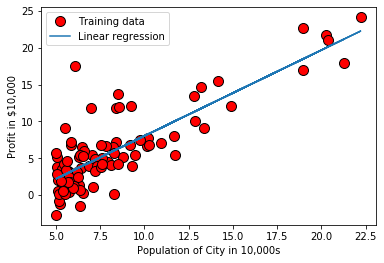

In [12]:
h_x = list()
for x in X:
    h_x.append(predict(x, theta0, theta1))
pyplot.plot(X, Y, 'ro', ms=10, mec='k')
pyplot.ylabel('Profit in $10,000')
pyplot.xlabel('Population of City in 10,000s')
pyplot.plot(X, h_x, '-')
pyplot.legend(['Training data', 'Linear regression'])

### 1.5 Make predictions

Use your learned parameters $\theta_j$ to make food truck profit predictions in areas with population of 40,000 and 65,000.

In [13]:
print('For population = 40,000, predicted profit = $%.2f' % (predict(4, theta0, theta1)*10000))
print('For population = 65,000, predicted profit = $%.2f' % (predict(6.5, theta0, theta1)*10000))

For population = 40,000, predicted profit = $10351.58
For population = 65,000, predicted profit = $39510.64


## 2. Multivariate Linear Regression

Now, you will implement multivariate linear regression (from scratch) to predict the quality of white wine given its chemical measures. You are given with the dataset `Data/ex2data2.txt`. The dataset contains 11 input varibles and one output variable. Here is the description:

- $x_1$ = Fixed acidity 
- $x_2$ = Volatile acidity 
- $x_3$ = Citric acid 
- $x_4$ = Residual sugar 
- $x_5$ = Chlorides 
- $x_6$ = Free sulfur dioxide 
- $x_7$ = Total sulfur dioxide 
- $x_8$ = Density 
- $x_9$ = pH 
- $x_{10}$ = Sulphates 
- $x_{11}$ = Alcohol 
- $y$ = Quality (score between 0 and 10)

You have to follow exactly the same steps as above i.e. implement hypothesis, cost function and gradient descent for multivariate linear regression. Finally, predict the quality of following two wines using your learned parameters $\theta$

- $x_1$ = 5.5, $x_2$ = 0.29, $x_3$ = 0.3, $x_4$ = 1.1, $x_5$ = 0.022, $x_6$ = 20, $x_7$ = 110, $x_8$ = 0.98869, $x_9$ = 3.34, $x_{10}$ = 0.38, $x_{11}$ = 12.8
- $x_1$ = 6, $x_2$ = 0.21, $x_3$ = 0.38, $x_4$ = 0.8, $x_5$ = 0.02, $x_6$ = 22, $x_7$ = 98, $x_8$ = 0.98941, $x_9$ = 3.26, $x_{10}$ = 0.32, $x_{11}$ = 11.8

In [14]:
'''Start your code here'''



data = np.loadtxt(os.path.join('Data', 'ex2data2.txt'), delimiter=',')
print(data.shape)
X, Y = data[:, 0:-1], data[:, -1]
print(X.shape)
print(Y.shape)


(4896, 12)
(4896, 11)
(4896,)


In [15]:
# print(X.shape)
# print(Y.shape)
# Y = np.transpose(Y)
# X = np.transpose(X)
# print(X.shape)
# print(Y.shape)
# Y=Y.reshape(1,4896)
# # f =[]
# # for i in Y:
# #     f.append(i)
# print(Y.shape)
    

In [16]:
### GRADED FUNCTION ###
def predict(X, theta0, thetas):
    h_x = theta0 + np.dot(X,thetas)    
    return h_x

In [17]:
### GRADED FUNCTION ###
def computeCost(X, Y, theta0, thetas):
    m = Y.size  # number of training examples
    h_x = theta0 + np.dot(X,thetas)    
    
#     a = np.square(h_x - Y)
    
    J = (np.sum(np.square(h_x - Y)))/(2*m)
    return J

In [18]:
computeCost(X,Y,0.0,np.zeros(X.shape[1]))

17.665543300653596

In [19]:
### GRADED FUNCTION ###
def gradientDescent(X, Y, alpha, n_epoch):
    m = Y.size
    J = list()  
    theta0 = 0.0 
    thetas = np.zeros(X.shape[1])
    
    for epoch in range(n_epoch):
        h_x = theta0 + np.dot(X,thetas)
        
        theta0 = theta0 - alpha* np.mean(h_x - Y)
        for i in range(X.shape[1]):
            thetas[i] = thetas[i] - alpha* np.mean(np.multiply(h_x - Y, X[:,i]))

        J.append(computeCost(X, Y, theta0, thetas))
    return theta0, thetas, J

In [20]:
n_epoch = 1500
alpha = 0.00005

theta0, thetas, J = gradientDescent(X ,Y, alpha, n_epoch)
print(theta0)
print(thetas)
print(J[-1])
# print("jhee")
# print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, thetas, J[-1]))
# print('Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834')

0.022299829674815697
[0.13980922 0.00441539 0.00631512 0.00392106 0.00055625 0.01073195
 0.00773937 0.02203395 0.07204813 0.01036381 0.28753823]
0.4348447623896614


In [21]:
𝑥1 = 5.5
𝑥2 = 0.29
𝑥3 = 0.3
𝑥4 = 1.1
𝑥5 = 0.022
𝑥6 = 20
𝑥7 = 110
𝑥8 = 0.98869
𝑥9 = 3.34
𝑥10 = 0.38
𝑥11 = 12.8
tX = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11]
predict(tX, theta0, thetas)

5.811573737611167

In [22]:
# 𝑥4 = 0.8, 𝑥5 = 0.02, 𝑥6 = 22, 𝑥7 = 98, 𝑥8 = 0.98941, 𝑥9 = 3.26, 𝑥10 = 0.32, 𝑥11 = 11.8
𝑥1 = 6
𝑥2 = 0.21
𝑥3 = 0.38
𝑥4 = 0.8
𝑥5 = 0.02
𝑥6 = 22
𝑥7 = 98
𝑥8 = 0.98941
𝑥9 = 3.26
𝑥10 = 0.32
𝑥11 = 11.8
tX = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11]
predict(tX, theta0, thetas)

5.515136327652072

Text(0.5, 0, 'Epochs')

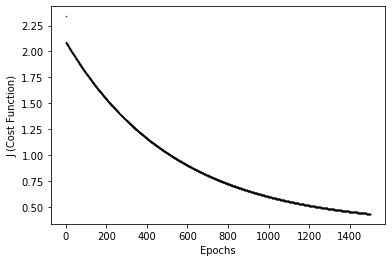

In [28]:
x_axis = [i for i in range(1,1501)]
pyplot.plot(x_axis, J, 'bo', ms=0.5, mec='k')
pyplot.ylabel('J (Cost Function)')
pyplot.xlabel('Epochs')